# Word2Vec: Learning Word Embeddings from Context

In this notebook, we will:
- Train Word2Vec on a free, real-world dataset
- Visualize word embeddings
- Explore semantic relationships
- Understand limitations of word-level embeddings

This notebook builds intuition for **why embeddings exist** —
before we move to tokenization and Transformers.

In [1]:
!pip install gensim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 30.9 MB/s eta 0:00:00


In [2]:
!pip install scikit-learn

In [3]:
import gensim
import gensim.downloader as api
from gensim.models import Word2Vec

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

## 1.Load a Free Dataset (Text8)
What is Text8?

Clean Wikipedia text

~17 million tokens

No punctuation

Commonly used for Word2Vec demos

Automatically downloaded

In [4]:
dataset = api.load("text8")  # iterable of tokenized sentences

[==================================================] 100.0% 31.6/31.6MB downloaded


In [7]:
for i, sentence in enumerate(dataset):
    print(sentence[10:20])
    if i == 2:
        break

['early', 'working', 'class', 'radicals', 'including', 'the', 'diggers', 'of', 'the', 'english']
['one', 'of', 'the', 'following', 'delay', 'in', 'or', 'total', 'lack', 'of']
['battlefield', 'the', 'entire', 'trojan', 'army', 'flees', 'behind', 'the', 'walls', 'of']


## 2.Training Word2Vec

In [10]:
# This is self-supervised learning — no labels needed.
model = Word2Vec(
    sentences=dataset,
    vector_size=100,
    window=5,
    min_count=5,
    sg=1,            # Skip-gram
    workers=4,
    epochs=3
)

## 3.Inspect the Learned Embeddings
Each word maps to a dense vector in ℝ¹⁰⁰.

In [11]:
model.wv["king"][:10]

array([-0.2871637 ,  0.02571003,  0.27891982,  0.00939761,  0.35310116,
       -0.36699054,  0.48269704,  0.32789335,  0.30154067,  0.3900164 ],
      dtype=float32)

In [12]:
model.wv.key_to_index["king"]

186

## 4. Semantic Similarity

In [13]:
model.wv.most_similar("king", topn=10)

[('prince', 0.7473302483558655),
 ('pretender', 0.7259740829467773),
 ('queen', 0.7221826910972595),
 ('haakon', 0.7144401669502258),
 ('canute', 0.7060645818710327),
 ('valdemar', 0.7032480835914612),
 ('burgundy', 0.6981043815612793),
 ('sigismund', 0.6965325474739075),
 ('macedon', 0.6955183744430542),
 ('kings', 0.6937351226806641)]

In [17]:
model.wv.most_similar("computer", topn=10)

[('computers', 0.7896519303321838),
 ('laptop', 0.7700462937355042),
 ('programmable', 0.766577959060669),
 ('hardware', 0.7650066614151001),
 ('computing', 0.7586321234703064),
 ('spreadsheet', 0.7572988271713257),
 ('microcomputer', 0.7552765011787415),
 ('bootstrap', 0.7547292113304138),
 ('pda', 0.7487438321113586),
 ('visicalc', 0.7405640482902527)]

## 5. Geometry Relationship

Remember from the slide: king − man + woman ≈ queen


Embeddings capture relationships, not just meanings

Geometry = semantics

In [18]:
model.wv.most_similar(
    positive=["king", "woman"],
    negative=["man"],
    topn=5
)

[('daughter', 0.6692121624946594),
 ('queen', 0.6493085026741028),
 ('sigismund', 0.637002170085907),
 ('consort', 0.6303465366363525),
 ('matilda', 0.6288245320320129)]

In [20]:
# Let's build a function to visualize word2vec in two dimensions using PCA
def visualizeWord2Vec(model, array):

    vectors = np.array([model.wv[w] for w in array])

    pca = PCA(n_components=2)
    vectors_2d = pca.fit_transform(vectors)

    plt.figure(figsize=(8, 6))
    for i, word in enumerate(array):
        plt.scatter(vectors_2d[i, 0], vectors_2d[i, 1])
        plt.text(vectors_2d[i, 0] + 0.02, vectors_2d[i, 1] + 0.02, word)

    plt.title("Word2Vec Embeddings (PCA projection)")
    plt.grid(True)
    plt.show()

Nearby points = semantically related words.

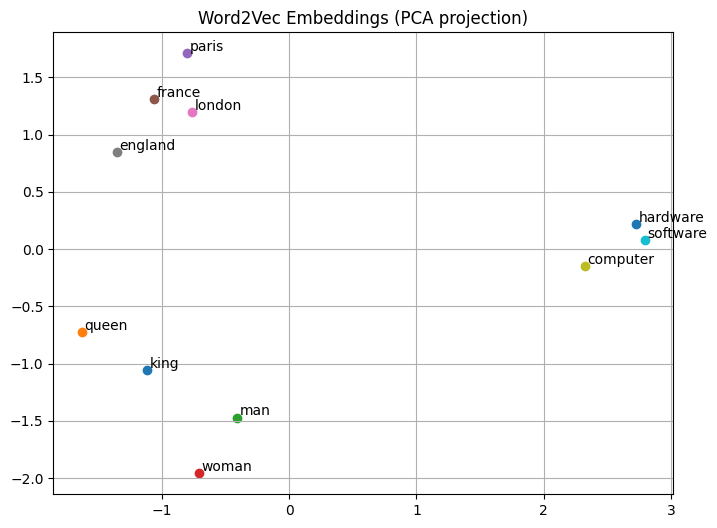

In [21]:
visualizeWord2Vec(model, ["king", "queen", "man", "woman",
    "paris", "france", "london", "england",
    "computer", "software", "hardware"])

## 6. Exercise (10 minutes)
1. Try CBOW instead of Skip-gram (`sg=0`)
2. Increase `vector_size` to 300 — what changes?
3. Compare similarity for:
   - "city"
   - "country"
4. Pick 10 words and visualize them

In [ ]:
## TO DO

## 7. Limitations of Word2Vec

- One embedding per word (no context)
  - "bank" (river vs finance) → same vector
- No notion of word order
- Vocabulary is fixed
- Cannot handle unseen words well

These limitations motivate:
➡ subword tokenization  
➡ contextual embeddings  
➡ Transformers